In [5]:
# Alexander Domagala
# ECE 6560 - Final Project - Sigmoid
# Spring 2024

# Performs image smoothing using Anisotropic Diffusion
# technique based on the sigmoidal penalty.

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

(100, 100)


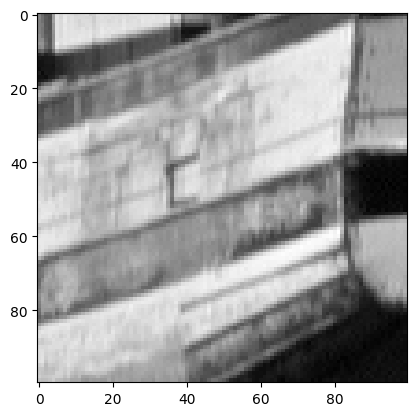

In [11]:
# load image
start_pix = 300
end_pix = start_pix+100
img = Image.open('../images/boats.bmp')
img = np.array(img)
img = img[start_pix:end_pix,start_pix:end_pix]

# display image
print(img.shape)
plt.imshow(img,cmap='gray')
plt.show()

(100, 100)


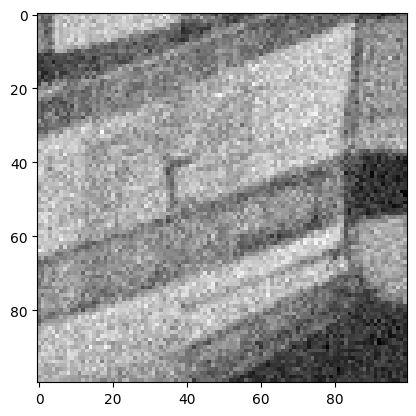

In [12]:
# add noise to image
mean = 0
std_dev = 20
noise = np.random.normal(mean, std_dev, (img.shape[0],img.shape[1]))
noisy_img = img + noise

# display image
print(noisy_img.shape)
plt.imshow(noisy_img, cmap='gray')
plt.show()

In [13]:
# Partial Derivative Approximations

def Ix(I,i,j):
  return (I[i+1,j] - I[i-1,j]) / 2

def Iy(I,i,j):
  return (I[i,j+1] - I[i,j-1]) / 2

def Ixx(I,i,j):
  return (I[i+1,j] - 2*I[i,j] + I[i-1,j])

def Iyy(I,i,j):
  return (I[i,j+1] - 2*I[i,j] + I[i,j-1])

def Ixy(I,i,j):
  return (I[i+1,j+1] - I[i+1,j-1] - I[i-1,j+1] + I[i-1,j-1]) / 4

In [14]:
# Intermediate Functions
E = .5

def gradient(Ix_input, Iy_input, power):
  Ix_squared = np.power(Ix_input, 2)
  Iy_squared = np.power(Iy_input, 2)
  return np.power(Ix_squared + Iy_squared + (E**2), power)

def e_alpha(beta, Ix_input, Iy_input, c):
  currGradient = gradient(Ix_input, Iy_input, -.5)
  return np.exp((-1/beta) * (currGradient - c))

def dDx_LIx(k, beta, c, Ix_input, Iy_input, Ixx_input, Ixy_input):
  return (k/beta) * ( Ixx_input*gradient(Ix_input,Iy_input,-.5) - Ix_input*gradient(Ix_input,Iy_input,-1.5) * (Ix_input*Ixx_input + Iy_input*Ixy_input) * ( e_alpha(beta,Ix_input,Iy_input,c) / ((1+e_alpha(beta,Ix_input,Iy_input,c))**2) ) +
                   Ix_input*gradient(Ix_input,Iy_input,-.5) * (-1/beta) * e_alpha(beta,Ix_input,Iy_input,c) * gradient(Ix_input,Iy_input,-.5) * (Ix_input*Ixx_input + Iy_input*Ixy_input) * ( ((1+e_alpha(beta,Ix_input,Iy_input,c))**-2) + e_alpha(beta,Ix_input,Iy_input,c) * (-2) * ((1+e_alpha(beta,Ix_input,Iy_input,c))**-3) ))

def dDy_LIy(k, beta, c, Ix_input, Iy_input, Iyy_input, Ixy_input):
  return (k/beta) * ( Iyy_input*gradient(Ix_input,Iy_input,-.5) - Iy_input*gradient(Ix_input,Iy_input,-1.5) * (Ix_input*Ixy_input + Iy_input*Iyy_input) * ( e_alpha(beta,Ix_input,Iy_input,c) / ((1+e_alpha(beta,Ix_input,Iy_input,c))**2)) +
                   Iy_input*gradient(Ix_input,Iy_input,-.5) * (-1/beta) * e_alpha(beta,Ix_input,Iy_input,c) * gradient(Ix_input,Iy_input,-.5) * (Ix_input*Ixy_input + Iy_input*Iyy_input) * ( ((1+e_alpha(beta,Ix_input,Iy_input,c))**-2) + e_alpha(beta,Ix_input,Iy_input,c) * (-2) * ((1+e_alpha(beta,Ix_input,Iy_input,c))**-3) ))


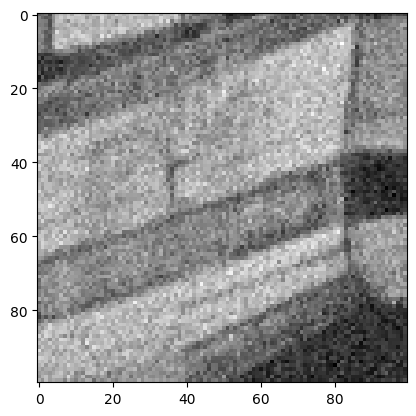

0


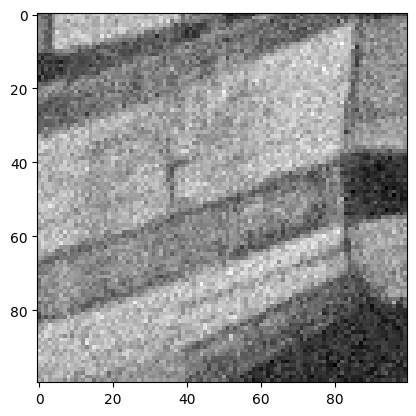

5


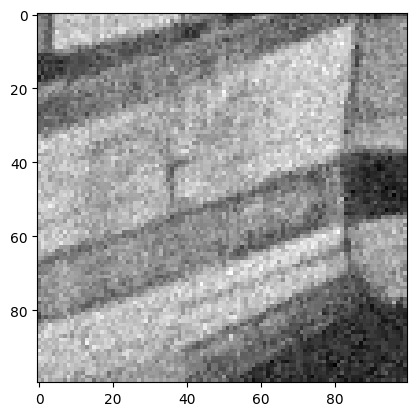

10


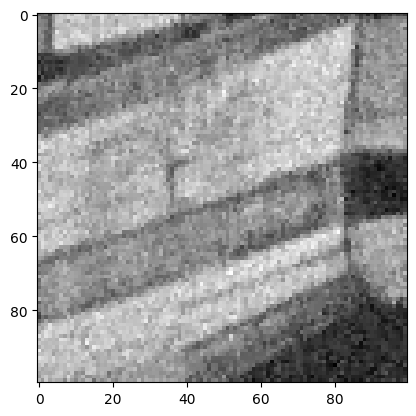

15


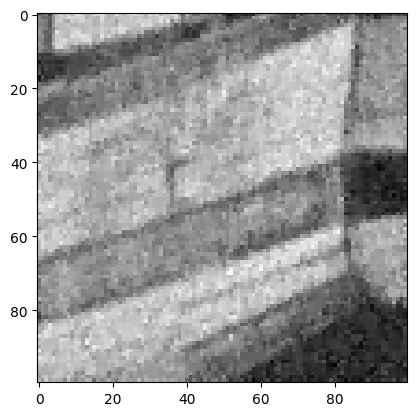

20


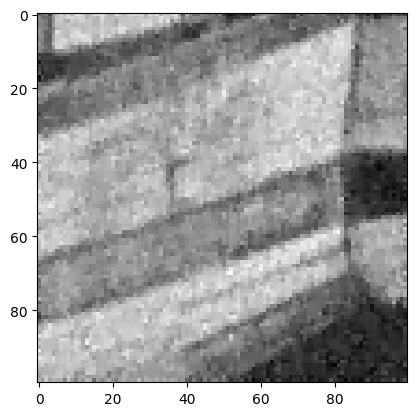

25


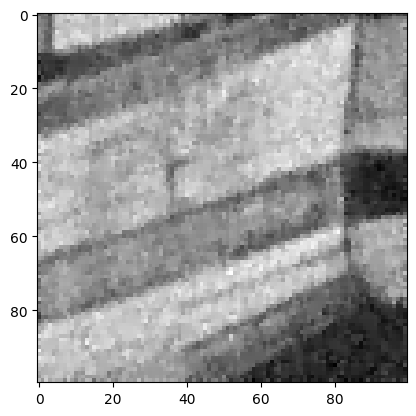

30


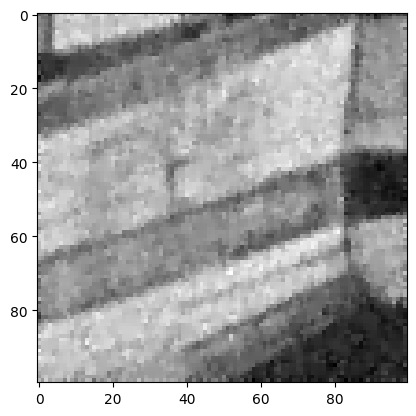

35


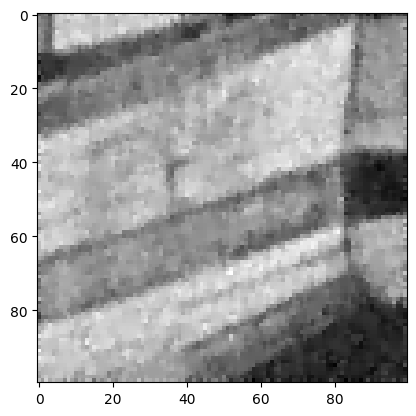

40


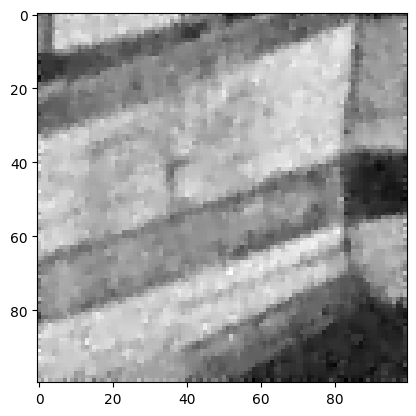

45


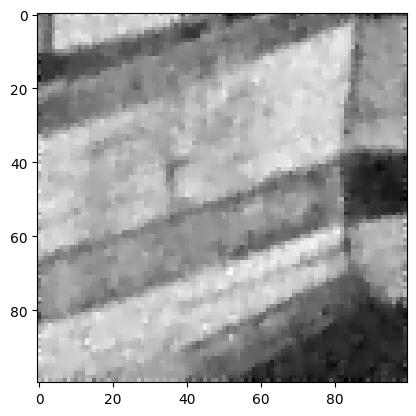

50


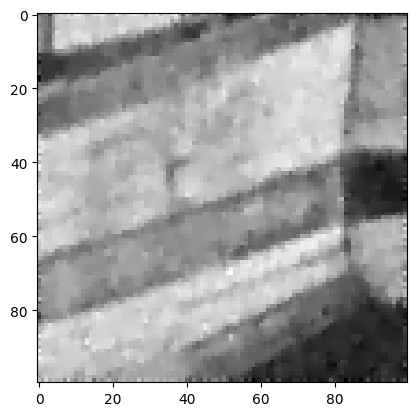

55


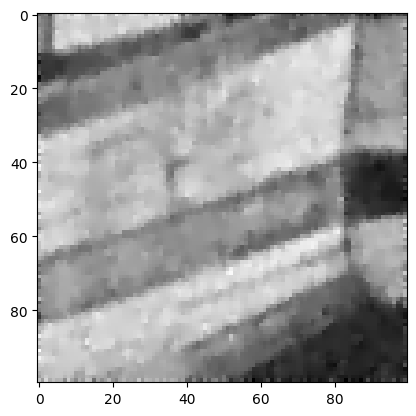

60


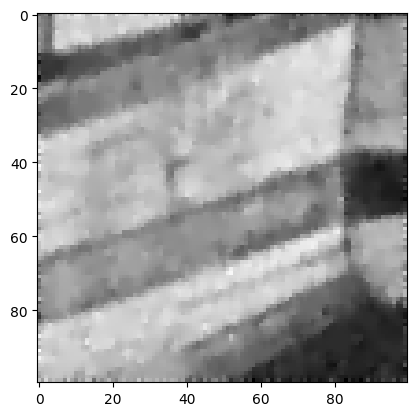

65


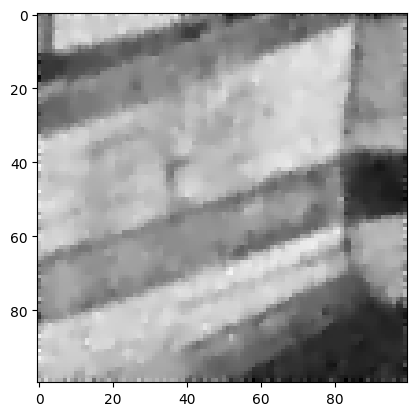

70


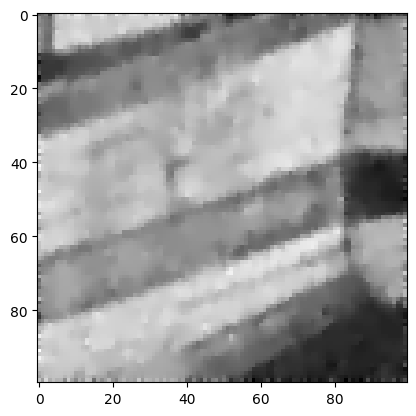

75


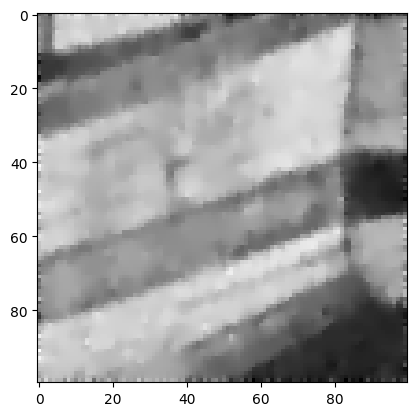

80


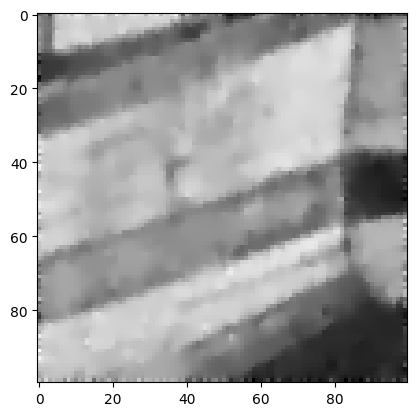

85


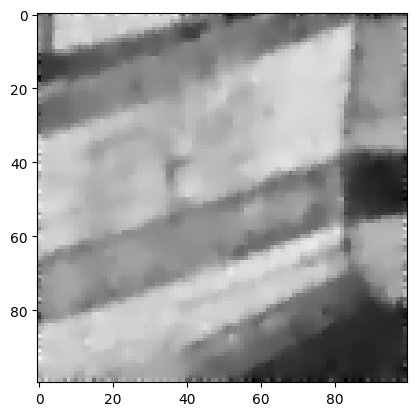

90


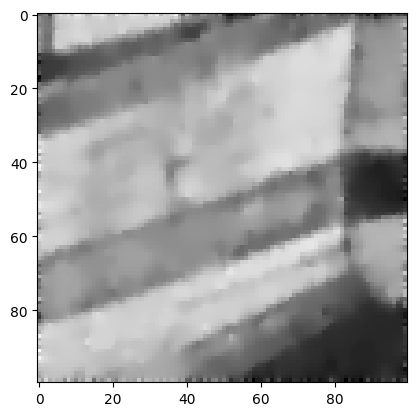

95


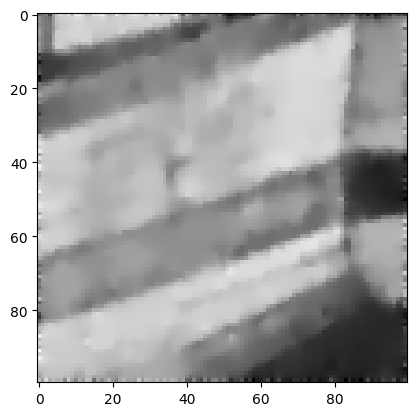

100


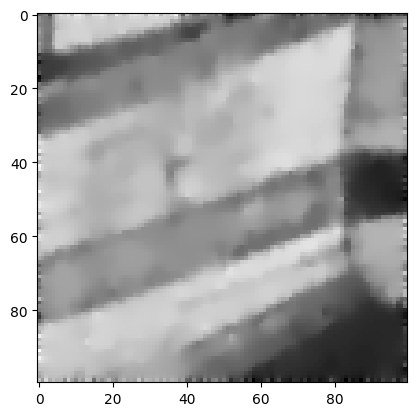

105


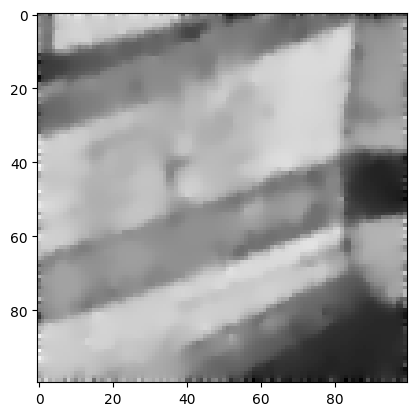

110


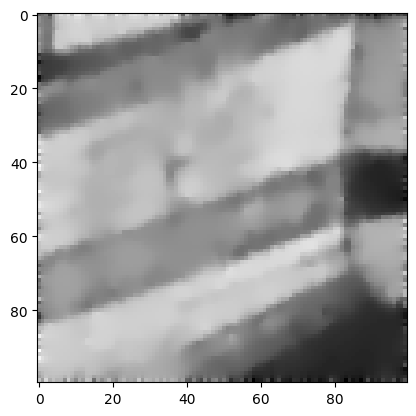

115


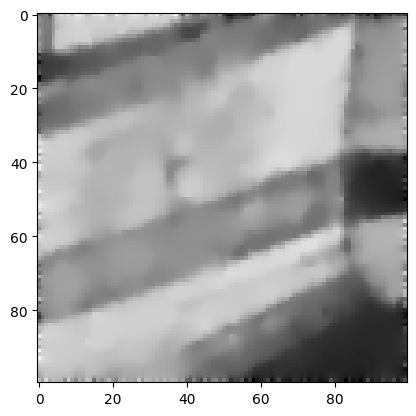

120


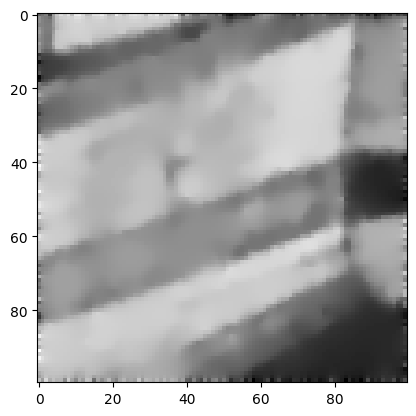

125


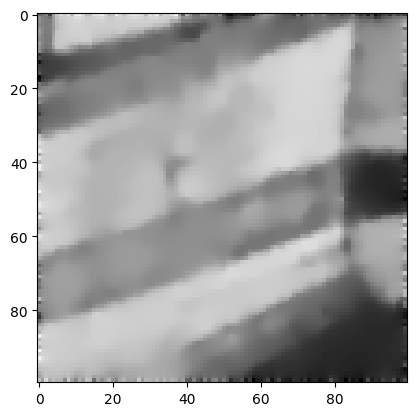

130


KeyboardInterrupt: 

In [10]:
iterations = 50
E = .5
timestep = .01
beta_const = 10.3
lambda_const = 100
c_const = 20
I = noisy_img
plt.imshow(I,cmap='gray')
plt.show()

# iterate through all the pixels in the image
for iter in range(iterations):
  for i in range(1,I.shape[0]-1):
    for j in range(1,I.shape[1]-1):

      # compute partial derivatives
      Ix_val  = Ix(I,i,j)
      Iy_val  = Iy(I,i,j)
      Ixx_val = Ixx(I,i,j)
      Iyy_val = Iyy(I,i,j)
      Ixy_val = Ixy(I,i,j)

      # compute update
      I[i,j] = I[i,j] + timestep * (dDx_LIx(lambda_const,beta_const,c_const,Ix_val,Iy_val,Ixx_val,Ixy_val) + 
                                    dDy_LIy(lambda_const,beta_const,c_const,Ix_val,Iy_val,Iyy_val,Ixy_val))
  # display progress
  if (iter % 5 == 0):
    print(iter)
    plt.imshow(I,cmap='gray')
    plt.show()